<a href="https://colab.research.google.com/github/ganeshbhargav03/CodeAlpha/blob/main/Topic_OCR_model_conversion_GPU_to_CPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 kB 13.9 MB/s eta 0:00:00


In [3]:
import easyocr
import cv2
reader_gpu = easyocr.Reader(['en'], gpu=True)
reader_cpu = easyocr.Reader(['en'], gpu=False)


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

/usr/local/lib/python3.10/dist-packages/easyocr/detection.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.load(trained_model, ma

In [8]:
image_path = '/content/model image.png'
image = cv2.imread(image_path)
results_gpu = reader_gpu.readtext(image)
results = sorted(results_gpu, key=lambda r: r[0][0][1])
sorted_results = sorted(results, key=lambda r: (r[0][0][0], r[0][0][1]))
ordered_text = ' '.join([result[1] for result in sorted_results])
#print(ordered_text)
print(ordered_text.upper())

HI THERE, HOW ARE YOU?|


In [9]:
import time

def calculate_fps(model, image, iterations=10):
    start_time = time.time()
    for _ in range(iterations):
        model.readtext(image)
    end_time = time.time()
    total_time = end_time - start_time
    fps = iterations / total_time
    return fps

fps_gpu = calculate_fps(reader_gpu, image)
fps_cpu = calculate_fps(reader_cpu, image)

print(f"FPS on GPU: {fps_gpu:.2f}")
print(f"FPS on CPU: {fps_cpu:.2f}")

FPS on GPU: 0.86
FPS on CPU: 0.49


In [11]:
import tensorflow as tf
import torch

device = torch.device('cpu')
reader = easyocr.Reader(['en'], gpu=False)
image_path = '/content/model image.png'
results_cpu = reader.readtext(image_path)
results = sorted(results_cpu, key=lambda r: r[0][0][1])
sorted_results = sorted(results_cpu, key=lambda r: (r[0][0][0], r[0][0][1]))
ordered_text_new = ' '.join([result[1] for result in sorted_results])

#print(ordered_text_new)
print(ordered_text_new.upper())


HI THERE, HOW ARE YOU?L


In [12]:
import time

start_time = time.time()
results_cpu = reader_cpu.readtext(image)
cpu_time = time.time() - start_time

start_time = time.time()
results_gpu = reader_gpu.readtext(image)
gpu_time = time.time() - start_time

print(f"Time taken by CPU model(Speed): {cpu_time:.4f} seconds")
print(f"Time taken by GPU model(Speed): {gpu_time:.4f} seconds")



Time taken by CPU model(Speed): 0.9702 seconds
Time taken by GPU model(Speed): 1.9485 seconds


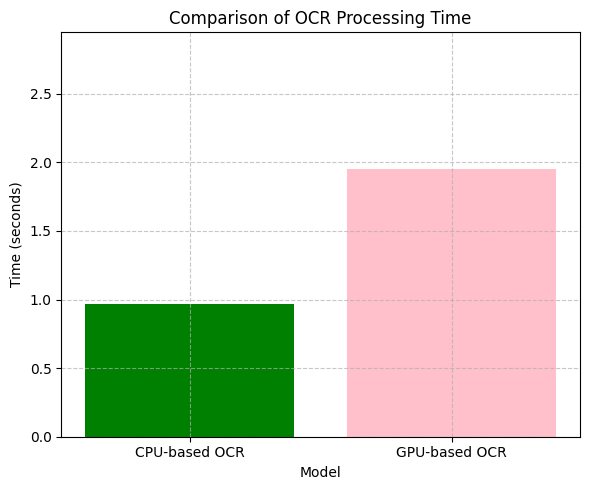

In [14]:
import matplotlib.pyplot as plt

models = ['CPU-based OCR', 'GPU-based OCR']
times = [cpu_time, gpu_time]

plt.figure(figsize=(6, 5))
plt.bar(models, times, color=['green', 'pink'])
plt.xlabel('Model')
plt.ylabel('Time (seconds)')
plt.title('Comparison of OCR Processing Time')
plt.ylim(0, max(times) + 1)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [15]:
ground_truth = "HI THERE, HOW ARE YOU?"

results_cpu = reader.readtext(image_path)
results = sorted(results_cpu, key=lambda r: r[0][0][1])
sorted_results = sorted(results_cpu, key=lambda r: (r[0][0][0], r[0][0][1]))
ordered_text_new = ' '.join([result[1] for result in sorted_results])
extracted_text=ordered_text_new.upper()
accuracy = sum(1 for a, b in zip(extracted_text, ground_truth) if a == b) / len(ground_truth)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


In [16]:
device = 'gpu' if torch.cuda.is_available() else 'cpu'
reader = easyocr.Reader(['en'], gpu=(device == 'gpu'))
image_path = '/content/model image.png'
num_reps = 10
start_time = time.time()

for _ in range(num_reps):
    reader.readtext(image_path)

end_time = time.time()

fps = num_reps / (end_time - start_time)
print(f"FPS on {device.upper()}: {fps:.2f}")

FPS on CPU: 0.90
